In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

In [3]:
teams_df = pd.read_csv('data/2025/womens_prem_teams.csv')
teams_df

,Club ID,Club
0,175309,ALLIANCE UNITED WOMEN
1,175383,FC LONDON WOMEN
2,175327,GUELPH UNITED WOMEN
3,175403,NDC ONTARIO WOMEN
4,175392,NORTH MISSISSAUGA SC WOMEN
5,175338,NORTH TORONTO WOMEN
6,175359,SIMCOE COUNTY ROVERS FC WOMEN
7,175295,VAUGHAN AZZURRI WOMEN
8,183407,WATERLOO UNITED WOMEN
9,175368,WOODBRIDGE STRIKERS WOMEN


In [4]:
scores_df = pd.read_csv('data/2025/2025-06-28_womens_prem_results.csv')
scores_df


,Match ID,Home result,Away result,Home team,Away team
0,261888691,1,1,183407,175309
1,261888692,2,1,175359,175383
2,261888693,0,9,175392,175403
3,261888694,0,2,175295,175368
4,261888695,3,3,175338,175327
5,261888696,3,0,175403,175309
6,261888697,0,5,175392,175295
7,261888698,2,1,175338,175359
8,261888699,2,4,175368,175327
9,261888700,1,3,183407,175383


In [5]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [6]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           ALLIANCE UNITED WOMEN  FC LONDON WOMEN  GUELPH UNITED WOMEN  NDC ONTARIO WOMEN  NORTH MISSISSAUGA SC WOMEN  NORTH TORONTO WOMEN  SIMCOE COUNTY ROVERS FC WOMEN  VAUGHAN AZZURRI WOMEN  WATERLOO UNITED WOMEN  WOODBRIDGE STRIKERS WOMEN
261888691                     -1                0                    0                  0                           0                    0                              0                      0                      1                          0
261888692                      0               -1                    0                  0                           0                    0                              1                      0                      0                          0
261888693                      0                0                    0                  1                          -1                    0                              0                      0                      0                          0
261888694                   

In [7]:
print(X_df.T.to_string())

                               261888691  261888692  261888693  261888694  261888695  261888696  261888697  261888698  261888699  261888700  261888701  261888702  261888703  261888704  261888705  261888706  261888707  261888708  261888709  261888710  261888711  261888712  261888713  261888714  261888715  261888716  261888717  261888718  261888719  261888720  261888721  261888722  261888723  261888724  261888725  261888726  261888727  261888728  261888729  261888730  261888731  261888732  261888733  261888734  261888735  261888736  261888737  261888738  261888739  261888740  261888741  261888742  261888743  261888744  261888745  261888747
ALLIANCE UNITED WOMEN                 -1          0          0          0          0         -1          0          0          0          0          0          0         -1          0          0         -1          0          0          0          0          0          0         -1          0          1          0          0          0          0      

In [8]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                               ALLIANCE UNITED WOMEN  FC LONDON WOMEN  GUELPH UNITED WOMEN  NDC ONTARIO WOMEN  NORTH MISSISSAUGA SC WOMEN  NORTH TORONTO WOMEN  SIMCOE COUNTY ROVERS FC WOMEN  VAUGHAN AZZURRI WOMEN  WATERLOO UNITED WOMEN  WOODBRIDGE STRIKERS WOMEN
ALLIANCE UNITED WOMEN                             11               -1                    0                 -2                          -1                    0                             -1                     -2                     -2                         -2
FC LONDON WOMEN                                   -1               11                   -1                  0                          -1                   -2                             -2                     -2                     -2                          0
GUELPH UNITED WOMEN                                0               -1                   12                 -2                          -2                   -2                             -2                     -

In [9]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                               ALLIANCE UNITED WOMEN  FC LONDON WOMEN  GUELPH UNITED WOMEN  NDC ONTARIO WOMEN  NORTH MISSISSAUGA SC WOMEN  NORTH TORONTO WOMEN  SIMCOE COUNTY ROVERS FC WOMEN  VAUGHAN AZZURRI WOMEN  WATERLOO UNITED WOMEN  WOODBRIDGE STRIKERS WOMEN
ALLIANCE UNITED WOMEN                             11               -1                    0                 -2                          -1                    0                             -1                     -2                     -2                         -2
FC LONDON WOMEN                                   -1               11                   -1                  0                          -1                   -2                             -2                     -2                     -2                          0
GUELPH UNITED WOMEN                                0               -1                   12                 -2                          -2                   -2                             -2                     -

In [10]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                               GD
ALLIANCE UNITED WOMEN          -6
FC LONDON WOMEN               -11
GUELPH UNITED WOMEN            -7
NDC ONTARIO WOMEN              23
NORTH MISSISSAUGA SC WOMEN    -27
NORTH TORONTO WOMEN            22
SIMCOE COUNTY ROVERS FC WOMEN  14
VAUGHAN AZZURRI WOMEN           8
WATERLOO UNITED WOMEN          -2
WOODBRIDGE STRIKERS WOMEN       0


In [11]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                               GD with limited blowouts
ALLIANCE UNITED WOMEN                                -6
FC LONDON WOMEN                                      -9
GUELPH UNITED WOMEN                                  -7
NDC ONTARIO WOMEN                                    16
NORTH MISSISSAUGA SC WOMEN                          -16
NORTH TORONTO WOMEN                                  13
SIMCOE COUNTY ROVERS FC WOMEN                        14
VAUGHAN AZZURRI WOMEN                                 8
WATERLOO UNITED WOMEN                                -2
WOODBRIDGE STRIKERS WOMEN                             0


In [12]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                               massey_rating
NORTH TORONTO WOMEN                 2.094103
NDC ONTARIO WOMEN                   1.707335
SIMCOE COUNTY ROVERS FC WOMEN       1.362706
VAUGHAN AZZURRI WOMEN               0.040909
GUELPH UNITED WOMEN                -0.295158
WATERLOO UNITED WOMEN              -0.470842
ALLIANCE UNITED WOMEN              -0.616842
FC LONDON WOMEN                    -0.733325
WOODBRIDGE STRIKERS WOMEN          -0.880561
NORTH MISSISSAUGA SC WOMEN         -2.208325


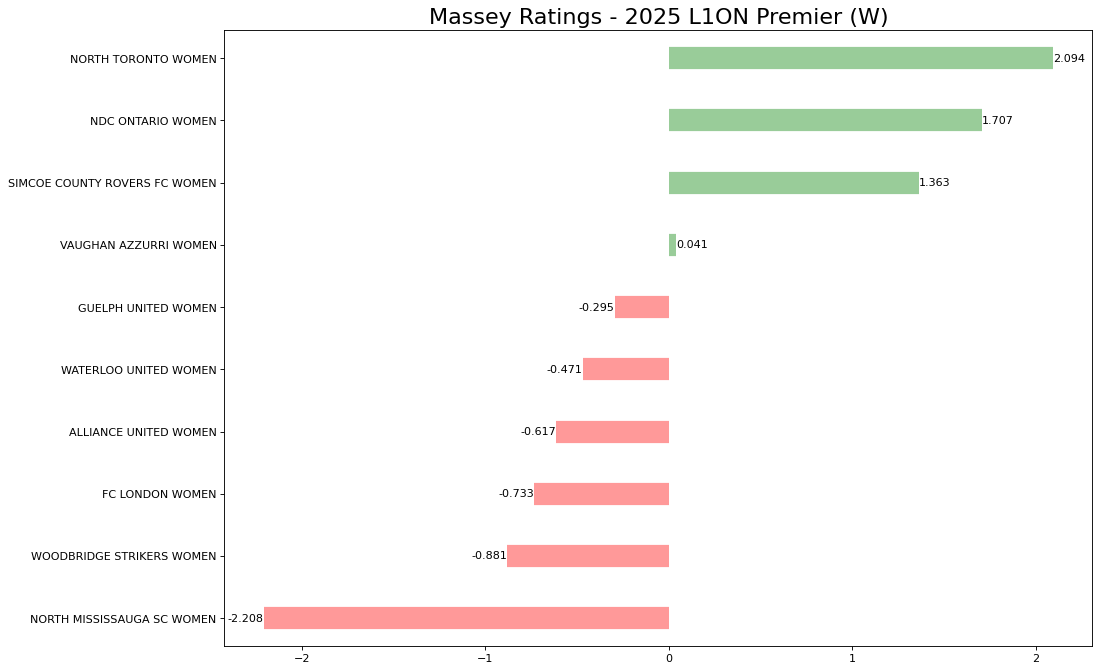

In [13]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 L1ON Premier (W)', fontdict={
          'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [14]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                               massey_rating
NORTH TORONTO WOMEN                 1.280327
SIMCOE COUNTY ROVERS FC WOMEN       1.229346
NDC ONTARIO WOMEN                   1.161408
VAUGHAN AZZURRI WOMEN               0.202640
GUELPH UNITED WOMEN                -0.342741
WATERLOO UNITED WOMEN              -0.353419
ALLIANCE UNITED WOMEN              -0.553305
FC LONDON WOMEN                    -0.590817
WOODBRIDGE STRIKERS WOMEN          -0.712710
NORTH MISSISSAUGA SC WOMEN         -1.320729


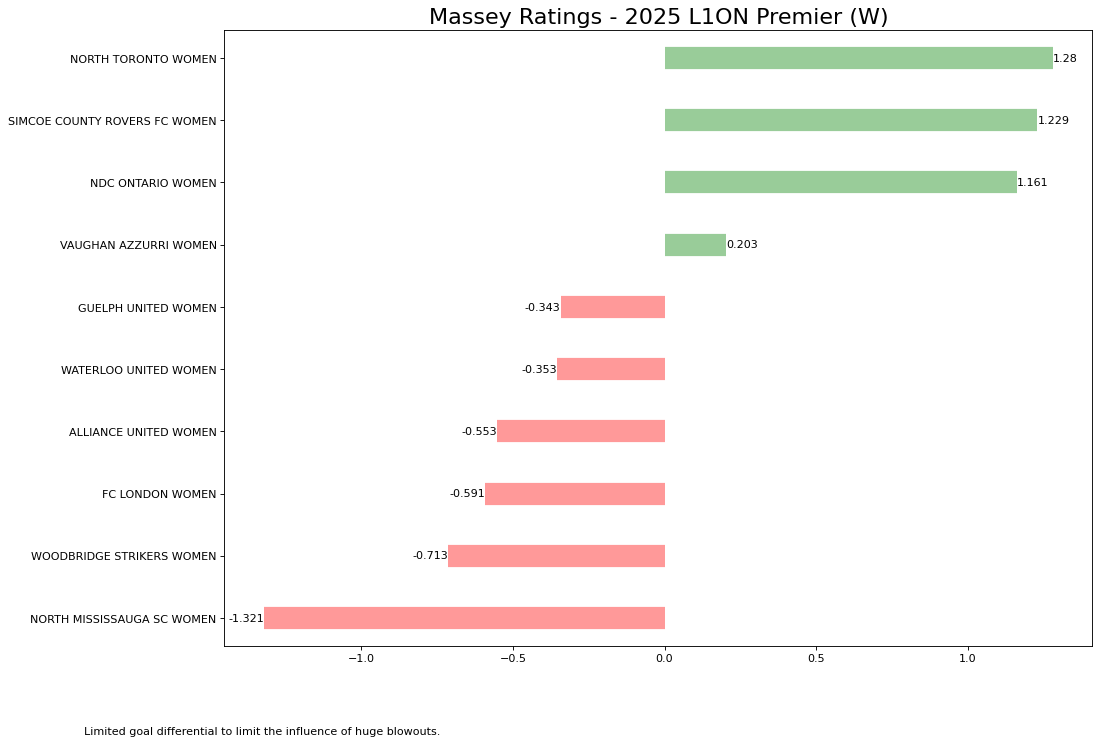

In [15]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 L1ON Premier (W)', fontdict={'size': 20})
plt.figtext(s='Limited goal differential to limit the influence of huge blowouts.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()